# Prediction of Red Wine & White Wine Quality 

Wine classification is a difficult task since taste is the least understood of the human senses. A good wine quality prediction can be very useful in the certification phase, since currently the sensory analysis is performed by human tasters, being clearly a subjective approach.

An automatic predictive system can be integrated into a decision support system, helping the speed and quality of the oenologist performance. Furthermore, a feature selection process can help to analyze the impact of the analytical tests. If it is concluded that several input variables are highly relevant to predict the wine quality, since in the production process some variables can be controlled, this information can be used to improve the wine quality.

(This introduction is extracted from "Modeling Wine Preferences from Physicochemical Properties using Fuzzy Techniques".)

It is not the only intriguing topic in wine industry. For example, vehicle riding and handling test is also conducted by human so it is hard to find correlation between specification and performance although some bias sensor which helps to evaluate performance objectively works well during test. Plus, there are lots of external variables. If we can build its predictive model, we can research and develop new products efficiently. In other words, it allows to reduce cost and develop time and even improve performance.

In [1]:
# Importing the Data set
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# Modelling Helpers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Modelling Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier  

C:\Users\ratna\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
RedWine = pd.read_csv("D:\\Data Science\\Apeel\\Data\\winequality-red.csv" , delimiter=';')
WhiteWine = pd.read_csv("D:\\Data Science\\Apeel\\Data\\winequality-white.csv",delimiter=';')

In [3]:
RedWine['Wine'] =  0 # Red
WhiteWine['Wine'] = 1 # White 

In [4]:
RedWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [5]:
WhiteWine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [6]:
#Checking for duplicates
print("Number of duplicates in red wine: "+ str(np.sum(np.array(RedWine.duplicated()))))
print("Number of duplicates in white wine:  "+ str(np.sum(np.array(WhiteWine.duplicated()))))

Number of duplicates in red wine: 240
Number of duplicates in white wine:  937


The red wine data has 240 duplicated rows whereas white wine has 937. While duplicated rows may cause biases in analysis and inference, I think the duplicated rows here look more like several wine tasters rating the same wine similarly. Hence, it will be relevant to keep all the observations as this can add more information.

# Combining the Tables 

In [7]:
# Combining the red and white wine data
Wines = RedWine.append(WhiteWine)
print(Wines.shape)

(6497, 13)


In [8]:
Wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# EDA (Exploratory Data Analysis)

### Red & White Wine Table Distribution (Good and Bad Wines)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D00029CC0>,
      dtype=object)

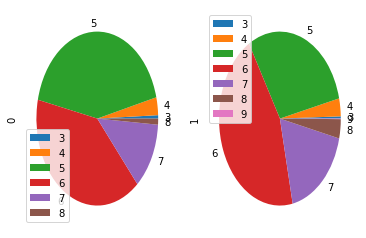

In [9]:
pie1 = Wines.groupby(['quality','Wine']).size().unstack(fill_value=0)
pie1.plot.pie(subplots=True)

In [10]:
Wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Summary Statistics 

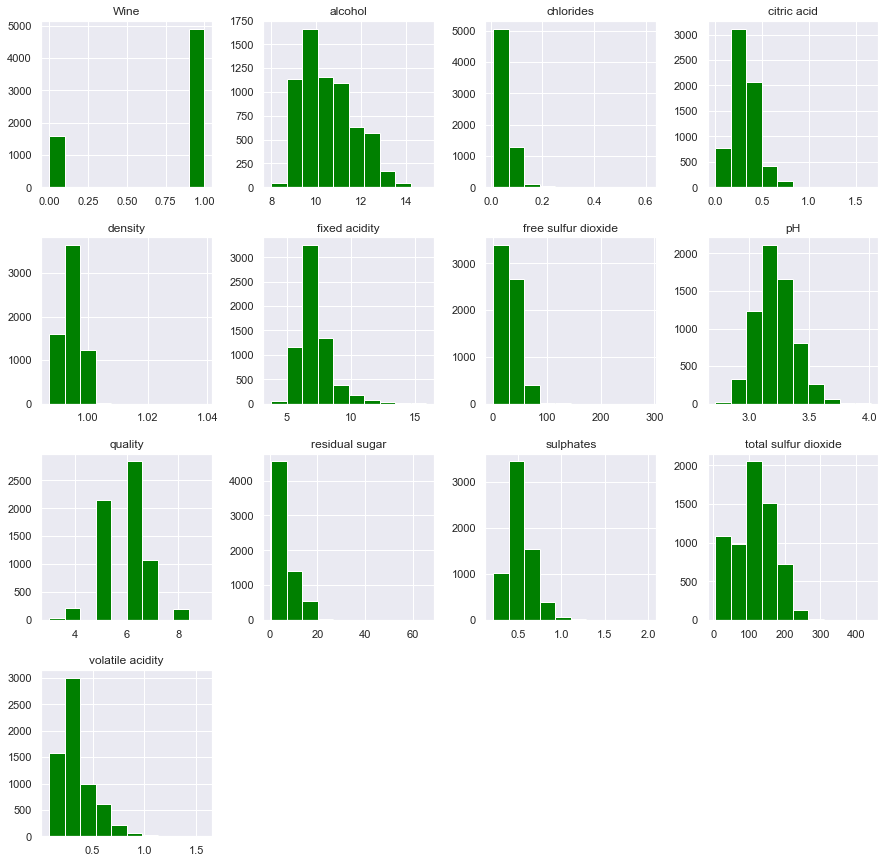

In [11]:
# Features for the wine data
sns.set()
pd.DataFrame.hist(Wines, figsize = [15,15], color='green')
plt.show()

- free sulfur dioxide from 0 to 120; total sulfur dioxide from 0 to 300.

- Volatile acidity from 0 to 1.1; sulphates from 0.2 to 1.3; chlorides from 0 to 0.4.

- Wine quality rating are discrete ranging from 3 to 9, with large proportion in the category 5, 6 & 7.

- The scale of the features are quite different. Hence, using algorithms that are based on distance, e.g. kNN, may focus unfairly on these features. To use such classifiers, the data would have to be           normalized.

### Correlation Heatmap

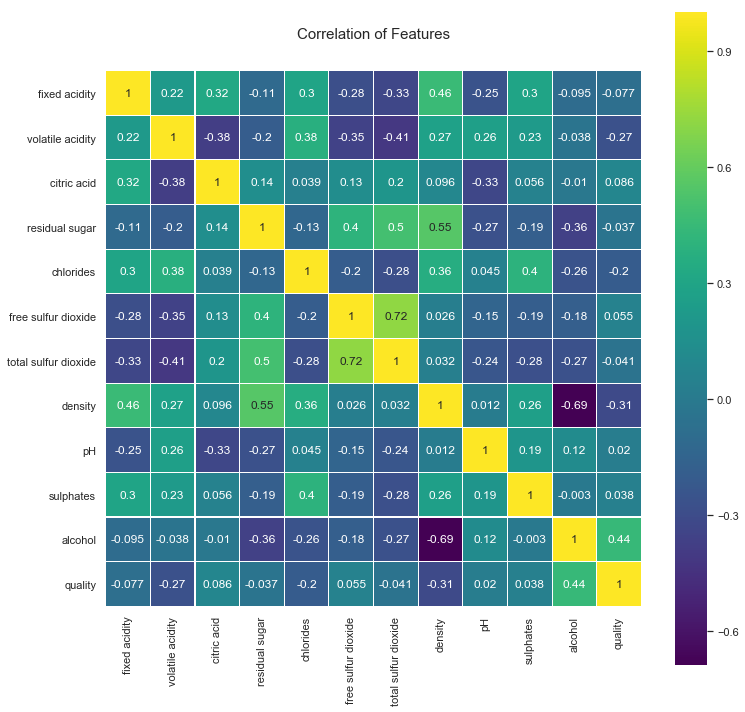

In [12]:
Temp = Wines.drop(['Wine'], axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(Temp.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

One thing that the correlation plot tells us is that there are very few features strongly correlated with one another. From the point of view of feeding these features into our ML models, this means that there isn't much redundant data as each feature carries with it some unique information.

From the plot, the two most correlated features free sulfur dioxide and total sulfur dioxide. Another point is that alcohol correlates most with quality than any of the other features at 0.44.

### Average Radar Chart - Analysis of Factores 

In [13]:
Wines['grade'] = 1 # good
Wines.grade[Wines.quality < 7] = 0 # not good
good = Wines[Wines.grade == 1]
notgood = Wines[Wines.grade == 0]

C:\Users\ratna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
drop_items = ['quality','grade']
g1 = pd.DataFrame(good.drop(drop_items, axis=1).mean(), columns=['Good']).T
g2 = pd.DataFrame(notgood.drop(drop_items, axis=1).mean(), columns=['Not Good']).T
total = pd.DataFrame(Wines.drop(drop_items, axis=1).mean(), columns=['Total Average']).T
data = g1.append([g2, total])

In [15]:
# Set standard
temp1 = data.values.reshape((3, 12))
standard = data.loc['Total Average'].values.reshape((1, 12))
temp = 100* temp1 / standard
data_percentage = pd.DataFrame(temp, columns = data.columns.values.tolist())

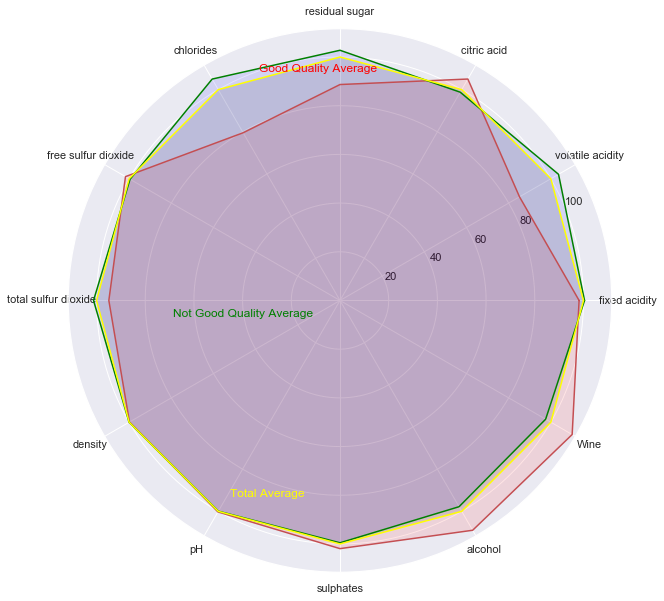

In [16]:
from math import pi
Attributes =list(data_percentage)
AttNo = len(Attributes)

values = data_percentage.iloc[0].tolist() #
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

values2 = data_percentage.iloc[1].tolist() # 
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

values3 = data_percentage.iloc[2].tolist() # 
values3 += values3 [:1]

angles3 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles3 += angles3 [:1]

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1],Attributes)

# Good 
ax.plot(angles, values, color = 'r')
ax.fill(angles, values, 'red', alpha=0.1)

# Not Good
ax.plot(angles2, values2, color = 'green')
ax.fill(angles2, values2, 'blue', alpha=0.1)

# Total Average
ax.plot(angles3, values3, color = 'yellow')
ax.fill(angles3, values3, 'black', alpha=0.1)

plt.figtext(0.4,0.82,'Good Quality Average',color='red')
plt.figtext(0.28,0.48,'Not Good Quality Average',color='green')
plt.figtext(0.36,0.23,'Total Average',color='yellow')
plt.show()

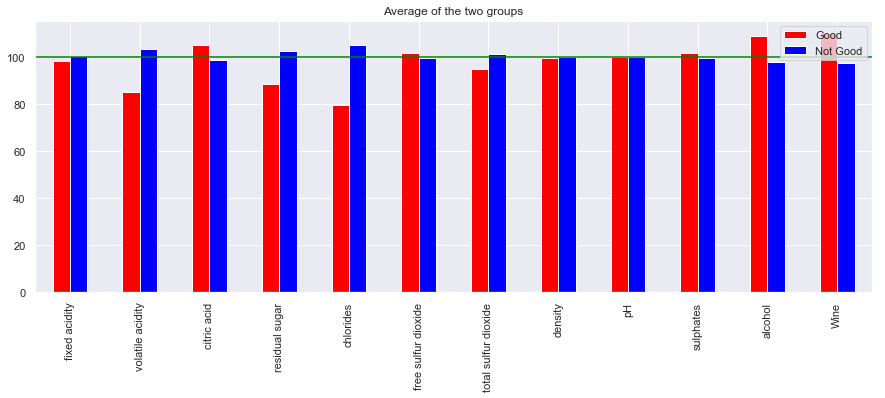

In [17]:
data_percentage[:2].T.plot(kind='bar',figsize=(15,5), color=['red','blue'])
plt.title('Average of the two groups')
plt.legend(('Good','Not Good'))
x = np.linspace(-10,100,10)
y = 100*np.ones(10)
plt.plot(x,y,'green')
plt.show()

# Modelling 

In [18]:
Y = Wines['grade']
X = Wines.drop('grade',axis=1)
X = X.drop('quality' , axis=1)

Text(0,0.5,'count')

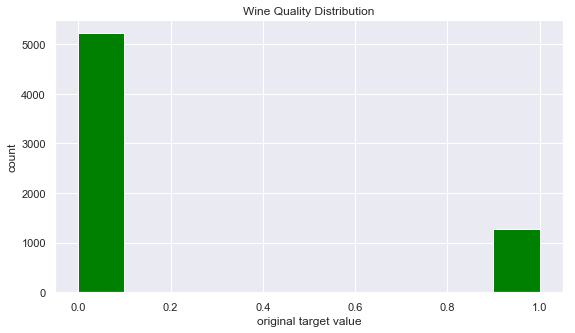

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(Y, color='green')
plt.title('Wine Quality Distribution')
plt.xlabel('original target value')
plt.ylabel('count')

#### Split the data into Train and Test 

In [20]:
seed = 8 # for reproducibility
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((5197, 12), (5197,), (1300, 12), (1300,))

### Evaluating on Basic Algo 

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM_rbf', SVC()))
models.append(('GBBosst', GradientBoostingClassifier()))

In [23]:
# Evaluate each model in turn
train_results = []
test_results = []
names = []
for name, model in models:
    cv_train_results = cross_val_score(model, X_train, y_train, 
                                       cv=10, scoring='accuracy')
    train_results.append(cv_train_results)
    clf = model.fit(X_train, y_train)
    cv_test_results = accuracy_score(y_test, clf.predict(X_test))
    test_results.append(cv_test_results)
    names.append(name)
    result = "%s: %f (%f) %f" % (name, cv_train_results.mean(), cv_train_results.std(), 
                                cv_test_results)
    print(result)

LR: 0.817784 (0.009659) 0.806923
RF: 0.870886 (0.011799) 0.881538
DT: 0.828923 (0.014938) 0.830769
SVM_rbf: 0.831053 (0.005784) 0.833077
GBBosst: 0.835862 (0.010329) 0.851538


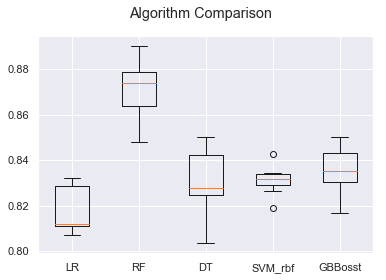

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

Random Forest Classifier has the highest training & test accuracy of about 87% , followed by Decision Trees with training & test accuracy of about 81% & 86% accuracy.

Let's create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. This is a population of accuracy measures for each algorithm as each algorithm was evaluated 5 times (5-fold cross validation).

## Random Forest has the highest cv score of about 87%.

In [25]:
RF = RandomForestClassifier(random_state=seed)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=8, verbose=0, warm_start=False)

#### Feature IMportance 

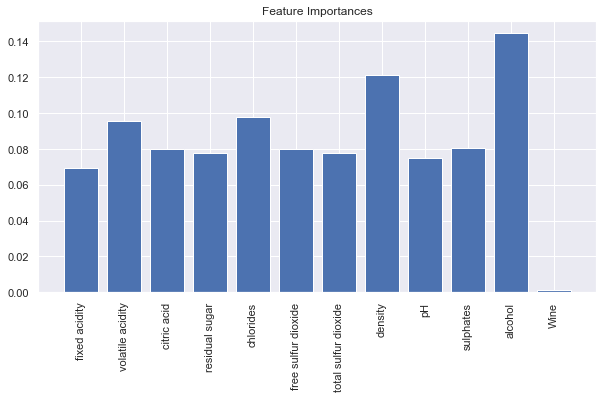

In [26]:
names = list(X_train.columns.values)
importances = RF.feature_importances_
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
y_pos = np.arange(len(names))
plt.bar(y_pos, importances, align='center')
plt.xticks(y_pos, names, rotation=90)
plt.show()

###  Hyperparameters tune

In [27]:
clf = RandomForestClassifier()
grid_values = {'max_features':['auto','sqrt','log2'],'max_depth':[None, 10, 5, 3, 1],
              'min_samples_leaf':[1, 5, 10, 20, 50]}
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
grid_clf = GridSearchCV(clf, param_grid=grid_values, cv=10, scoring='accuracy')
grid_clf.fit(X_train, y_train) # fit and tune model

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 5, 3, 1], 'min_samples_leaf': [1, 5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
grid_clf.best_params_

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1}

### Model Check 

In [30]:
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Training Accuracy :: ', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy :: ', accuracy_score(y_test, y_pred))

Training Accuracy ::  0.9913411583605927
Test Accuracy ::  0.8884615384615384


In [31]:
# Checking the Confusion matrix for false positive and False negative rate 
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print ("True Positives:", tp)
print ("True Negatives:", tn)
print ("False Positives:", fp)
print ("False Negatives:", fn)

True Positives: 152
True Negatives: 1003
False Positives: 33
False Negatives: 112


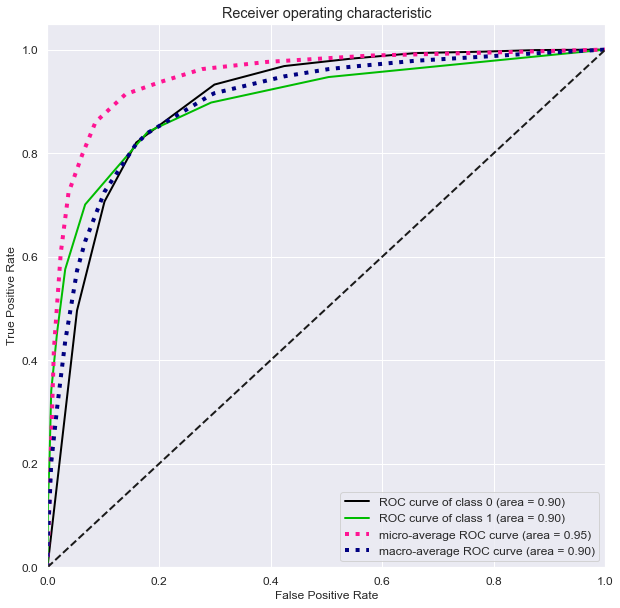

In [32]:
# Model performance on the Test Data (Imbalanced Dataset) and checked the AUC-ROC curve 

y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas,figsize=(10, 10) ,title='Receiver operating characteristic' ,plot_macro=True,plot_micro=True)
plt.show()